In [2]:
#导入tushare、pandas等库
import tushare as ts
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib import ticker as mticker
import datetime as dt
import matplotlib as mpl
import mplfinance as mpf
from datetime import datetime
import pylab as pl

In [3]:
#获取青岛啤酒数据
ts.set_token('32b8468e7397e72da67b1acfe011701bfeffba30aaa26652053703d6')#初始化
pro = ts.pro_api('32b8468e7397e72da67b1acfe011701bfeffba30aaa26652053703d6')
print(ts.get_hist_data('600600',start='2019-07-01',end='2020-08-10'))#查看青海啤酒(600600）指定时间内k线数据
df=ts.get_hist_data('600600',start='2019-07-01',end='2020-08-10')
print(df)#查看赋值是否成功
df.to_csv('D:/青海啤酒股票k线数据.csv')#将股票数据存为csv文件
df=pd.read_csv('D:/青海啤酒股票k线数据.csv')#导入本地存储的股票数据csv文件
print('df:',df)#查看df数据
raw_time = pd.to_datetime(df.pop('date'), format='%Y/%m/%d')#取出时间
print(raw_time)#查看时间取出是否成功

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
             open   high  close    low     volume  price_change  p_change  \
date                                                                        
2020-08-10  78.50  78.50  76.83  75.10   53583.30         -0.12     -0.16   
2020-08-07  79.20  79.49  76.95  74.51   89969.45         -1.85     -2.35   
2020-08-06  81.11  81.35  78.80  78.19   86453.14         -2.31     -2.85   
2020-08-05  80.12  81.69  81.11  79.26   61229.46          0.08      0.10   
2020-08-04  82.00  83.02  81.03  80.40   76651.17         -1.32     -1.60   
2020-08-03  83.00  83.35  82.35  80.20  102815.07         -0.65     -0.78   
2020-07-31  84.57  85.00  83.00  81.71   89232.13         -1.58     -1.87   
2020-07-30  83.99  87.00  84.58  82.61   72192.04          0.53      0.63   
2020-07-29  83.22  84.09  84.05  81.50   56341.29          0.70      0.84   
2020-07-28  81.00  84.60  83.35  80.25   68484.14          2.87      3.57   
2020-07-27  80.23  82.3

             open   high  close    low     volume  price_change  p_change  \
date                                                                        
2020-08-10  78.50  78.50  76.83  75.10   53583.30         -0.12     -0.16   
2020-08-07  79.20  79.49  76.95  74.51   89969.45         -1.85     -2.35   
2020-08-06  81.11  81.35  78.80  78.19   86453.14         -2.31     -2.85   
2020-08-05  80.12  81.69  81.11  79.26   61229.46          0.08      0.10   
2020-08-04  82.00  83.02  81.03  80.40   76651.17         -1.32     -1.60   
2020-08-03  83.00  83.35  82.35  80.20  102815.07         -0.65     -0.78   
2020-07-31  84.57  85.00  83.00  81.71   89232.13         -1.58     -1.87   
2020-07-30  83.99  87.00  84.58  82.61   72192.04          0.53      0.63   
2020-07-29  83.22  84.09  84.05  81.50   56341.29          0.70      0.84   
2020-07-28  81.00  84.60  83.35  80.25   68484.14          2.87      3.57   
2020-07-27  80.23  82.37  80.48  78.78   45690.34          0.15      0.19   

OSError: Initializing from file failed

                  open      high     close       low    volume  price_change  \
open          1.000000  0.995743  0.993291  0.997190  0.089640      0.018723   
high          0.995743  1.000000  0.997971  0.996954  0.117414      0.088068   
close         0.993291  0.997971  1.000000  0.997353  0.105333      0.124424   
low           0.997190  0.996954  0.997353  1.000000  0.081013      0.071740   
volume        0.089640  0.117414  0.105333  0.081013  1.000000      0.225941   
price_change  0.018723  0.088068  0.124424  0.071740  0.225941      1.000000   
p_change      0.017236  0.081528  0.114905  0.063950  0.294148      0.967736   
ma5           0.994408  0.992023  0.991460  0.993716  0.058380      0.029334   
ma10          0.984188  0.980308  0.979467  0.982808  0.027191      0.013218   
ma20          0.963198  0.958084  0.957304  0.961463  0.003837      0.002836   
v_ma5         0.137486  0.155674  0.145238  0.132979  0.668992      0.070770   
v_ma10        0.157581  0.173591  0.1617

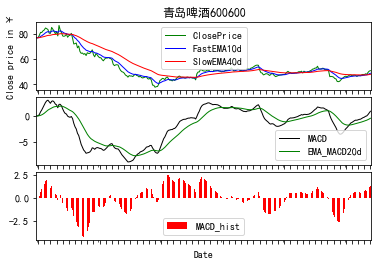

In [7]:
# 计算包括相关系数矩阵、RSI、MACD等参考因子
# 相关系数矩阵计算
correlation = df.corr()
print(correlation)#查看相关系数矩阵

# MACD因子计算
df = df.dropna()
df.head()
df.index.name = 'Date'
df.shape
df.head(3)
df.tail(3)

# EMA指数移动平均线
num_periods_fast = 10  # 快速EMA的时间周期，10
# K:平滑常数，取2/(n+1)
K_fast = 2 / (num_periods_fast + 1)  # 快速EMA平滑常数
ema_fast = 0
num_periods_slow = 40  # 慢速EMA的时间周期，40
K_slow = 2 / (num_periods_slow + 1)  # 慢速EMA平滑常数
ema_slow = 0
num_periods_macd = 20  # MACD EMA的时间周期，20
K_macd = 2 / (num_periods_macd + 1)  # MACD EMA平滑常数
ema_macd = 0

ema_fast_values = []  
ema_slow_values = []  
macd_values = []  
macd_signal_values = []  

# MACD - MACD-EMA
MACD_hist_values = []  
for close_price in df['close']:
    if ema_fast == 0:  # 第一个值
        ema_fast = close_price
        ema_slow = close_price
    else:
        ema_fast = (close_price - ema_fast) * K_fast + ema_fast
        ema_slow = (close_price - ema_slow) * K_slow + ema_slow

    ema_fast_values.append(ema_fast)
    ema_slow_values.append(ema_slow)


	# MACD is fast_MA - slow_EMA
    macd = ema_fast - ema_slow  
    if ema_macd == 0:
        ema_macd = macd
    else:
    	# signal is EMA of MACD values
        ema_macd = (macd - ema_macd) * K_macd + ema_macd  
    macd_values.append(macd)
    macd_signal_values.append(ema_macd)
    MACD_hist_values.append(macd - ema_macd)

df = df.assign(ClosePrice=pd.Series(df['close'], index=df.index))
df = df.assign(FastEMA10d=pd.Series(ema_fast_values, index=df.index))
df = df.assign(SlowEMA40d=pd.Series(ema_slow_values, index=df.index))
df = df.assign(MACD=pd.Series(macd_values, index=df.index))
df = df.assign(EMA_MACD20d=pd.Series(macd_signal_values, index=df.index))
df = df.assign(MACD_hist=pd.Series(MACD_hist_values, index=df.index))

close_price = df['ClosePrice']
ema_f = df['FastEMA10d']
ema_s = df['SlowEMA40d']
macd = df['MACD']
ema_macd = df['EMA_MACD20d']
macd_hist = df['MACD_hist']


# 设置画布，纵向排列的三个子图
fig, ax = plt.subplots(3, 1)

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False
plt.subplots_adjust(hspace=.1)

ax[0].set_ylabel('Close price in ￥')
ax[0].set_title('青岛啤酒600600' )
close_price.plot(ax=ax[0], color='g', lw=1., legend=True, use_index=False)
ema_f.plot(ax=ax[0], color='b', lw=1., legend=True, use_index=False)
ema_s.plot(ax=ax[0], color='r', lw=1., legend=True, use_index=False)

ax[1] = plt.subplot(312, sharex=ax[0])
macd.plot(ax=ax[1], color='k', lw=1., legend=True, sharex=ax[0], use_index=False)
ema_macd.plot(ax=ax[1], color='g', lw=1., legend=True, use_index=False)

ax[2] = plt.subplot(313, sharex=ax[0])
df['MACD_hist'].plot(ax=ax[2], color='r', kind='bar', legend=True, sharex=ax[0])

# 设置合适的间隔，以便图形横坐标可以正常显示
interval = 5
# 设置x轴参数，应用间隔设置
# 时间序列转换
# x轴标签旋转便于显示
pl.xticks([i for i in range(1, 273 + 1, interval)],
          [datetime.strftime(i, format='%Y-%m-%d') for i in \
           pd.date_range(df.index[0], df.index[-1], freq='%dd' % (interval))],
          rotation=45)
plt.show()


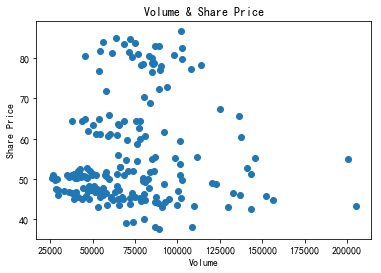

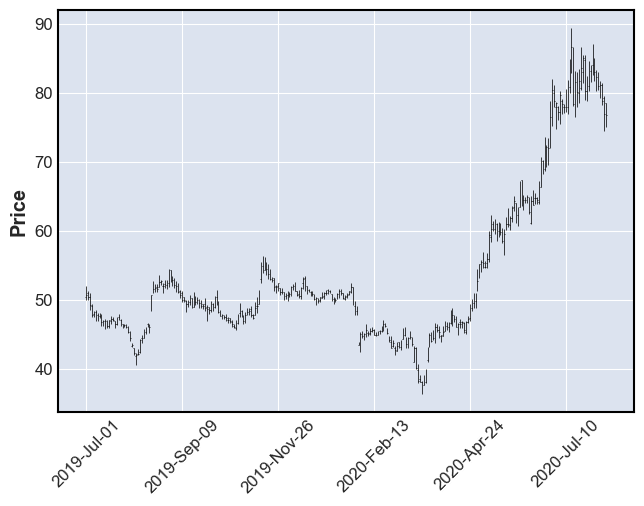

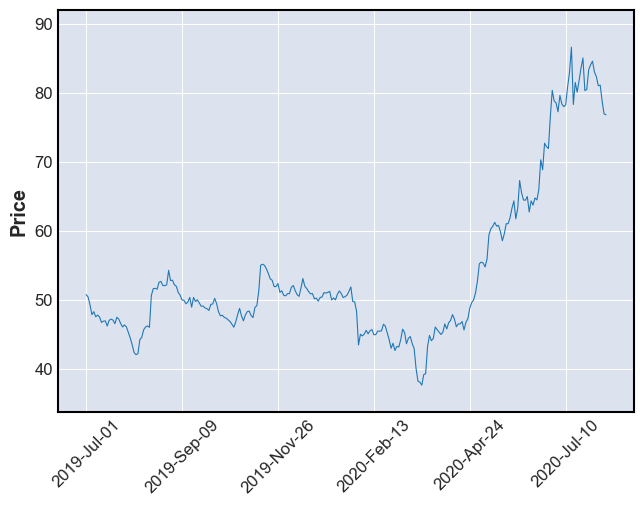

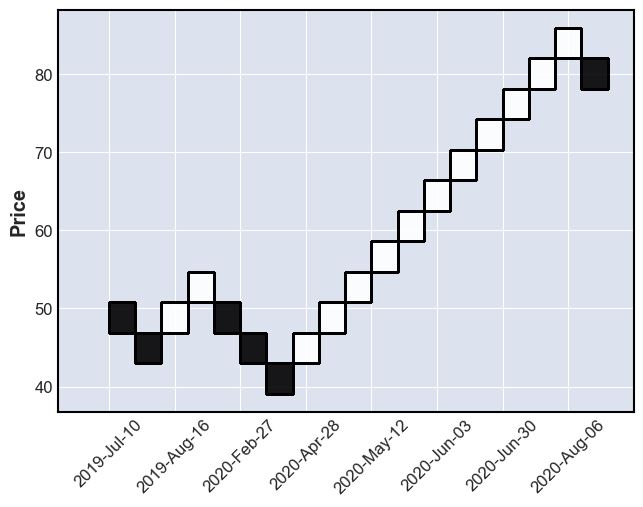

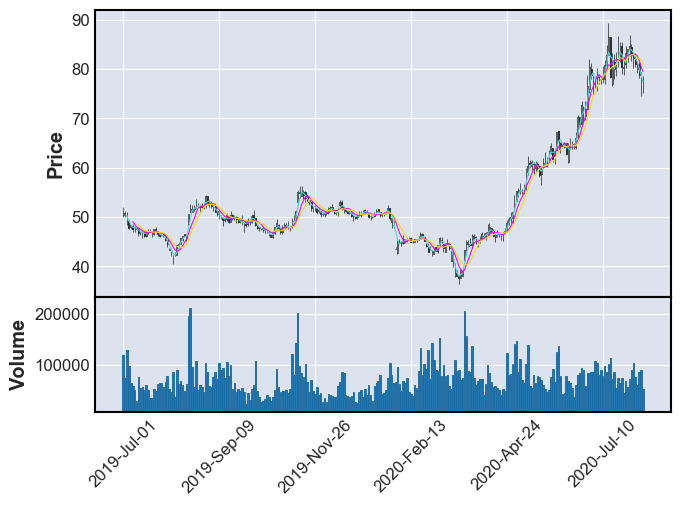

In [10]:
#绘制散点图
plt.scatter(df['volume'][:200], df['close'][:200])  # 切片，取前200组数据
plt.xlabel('Volume')
plt.ylabel('Share Price')
plt.title('Volume & Share Price')
plt.show()


#绘制折线图、点状图、曲线图等多种图
daily = pd.read_csv('600600kxian.csv',index_col=0,parse_dates=True)
daily = daily.dropna()
daily.head()
daily.index.name = 'Date'
daily.shape
daily.head(3)
daily.tail(3)

import mplfinance as mpf

mpf.plot(daily)
mpf.plot(daily,type='line')
mpf.plot(daily, type='renko')
# mpf.plot(daily,type='ohlc',mav=4)
# # mpf.plot(daily,type='candle',mav=(3,6,9))
mpf.plot(daily,type='candle',mav=(3,6,9),volume=True)
plt.show()


In [ ]:
#
探索性分析结论
1. 分析青岛啤酒年K线，总体呈现平稳上升的态势，且目前并未到达历史高位，考虑到实际现实中的疫情影响导致消费水平、消费能力的下降，青岛啤酒的股价或处于平台期，波动不大，适合观望或持股待出。
2. 当前青岛啤酒计算离差值（DIF）和慢速线（DEA）均大于0，即在图形上表示为它们处于零线以上，并向上移动，表示青岛啤酒股价行情处于多头行情中，可以买入开仓或多头持仓。
3. 青岛啤酒MACD柱为金叉状态，表示应买入，市场由空头转为多头